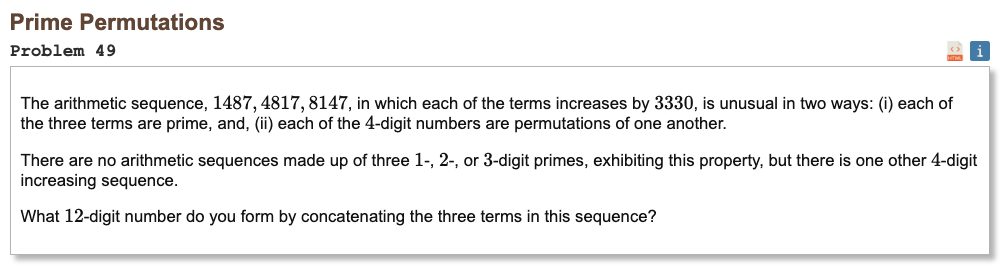

## Initial approach

Lets see how many 4 digit primes are there.

In [1]:
def is_prime(n):
    if n < 2:
        return False
    for i in range(2, int(n**0.5)+1):
        if n % i == 0:
            return False
    return True

In [2]:
count = 0
for i in range(1000,10000):
    if is_prime(i):
        count+=1

count

1061

Okay, it makes sense to list them.

In [3]:
four_digit_primes = [x for x in range(1000,10000) if is_prime(x)]

Take permutations of each prime where the permutations are also prime.

In [4]:
from itertools import permutations

prime_set = set(four_digit_primes)
valid_primes = []

for prime in four_digit_primes:
    perms = set(int("".join(p)) for p in permutations(str(prime)))
    prime_perms = sorted([p for p in perms if p in prime_set])
    if len(prime_perms) >= 3:
        valid_primes.append((prime, prime_perms))

valid_primes

[(1013, [1013, 1031, 1103, 1301, 3011]),
 (1019, [1019, 1091, 1109, 1901, 9011]),
 (1021, [1021, 1201, 2011]),
 (1031, [1013, 1031, 1103, 1301, 3011]),
 (1033, [1033, 1303, 3301]),
 (1039, [1039, 1093, 3019, 3109, 9013, 9103]),
 (1049, [1049, 1409, 4019, 4091, 9041]),
 (1051, [1051, 5011, 5101]),
 (1061, [1061, 1601, 6011, 6101]),
 (1063, [1063, 3061, 6301]),
 (1069, [1069, 1609, 6091, 9601]),
 (1091, [1019, 1091, 1109, 1901, 9011]),
 (1093, [1039, 1093, 3019, 3109, 9013, 9103]),
 (1097, [1097, 1709, 1907, 7019, 7109, 7901]),
 (1103, [1013, 1031, 1103, 1301, 3011]),
 (1109, [1019, 1091, 1109, 1901, 9011]),
 (1123, [1123, 1213, 1231, 1321, 2113, 2131, 2311, 3121]),
 (1153, [1153, 1531, 3511, 5113]),
 (1163, [1163, 1361, 1613, 6113, 6131, 6311]),
 (1181, [1181, 1811, 8111]),
 (1187, [1187, 1871, 8117, 8171]),
 (1193, [1193, 1319, 1913, 1931, 3119, 3191, 3911, 9311]),
 (1201, [1021, 1201, 2011]),
 (1213, [1123, 1213, 1231, 1321, 2113, 2131, 2311, 3121]),
 (1217, [1217, 1721, 2711, 7121, 7

Find ones have constant differences.

In [5]:
results = []

for prime in four_digit_primes:
    perms = set(int("".join(p)) for p in permutations(str(prime)))
    prime_perms = sorted([p for p in perms if p in prime_set])
    for i in range(len(prime_perms)):
        for j in range(i + 1, len(prime_perms)):
            diff = prime_perms[j] - prime_perms[i]
            third = prime_perms[j] + diff
            if third in prime_perms:
                triplet = [prime_perms[i], prime_perms[j], third]
                if triplet not in results:
                    results.append(triplet)

results

[[1487, 4817, 8147], [2969, 6299, 9629]]

So numbers are 2969, 6299, 9629.   
Result is 296962999629